In [1]:
# encoding: utf-8
# Author: Zhuangwei Kang

import os, sys
import matplotlib.pyplot as plt
from matplotlib import style
sys.path.append('../../../')
from datapsr import *
import numpy as np
style.use(['classic'])
plt.rc('axes', axisbelow=True)
dpi=600

In [2]:
data_len = [64, 256, 1024, 4096, 16384]
plugins = ['kube-router', 'flannel-ipsec', 'weavenet-unicast', 'weavenet-multicast', 'weavenet-ddssec']
perf, _ = load_data(subtests=range(len(data_len)), plugins=plugins)
for i, cni in enumerate(plugins):
    asp = perf[perf['cni'] == cni]['mbps(ave)']
    print(asp.to_list())


[0.6, 2.4, 8.3, 16.0, 21.6]
[0.6, 2.2, 6.6, 9.6, 13.8]
[0.4, 1.3, 3.9, 6.6, 10.1]
[0.4, 1.2, 3.0, 4.3, 8.8]
[0.6, 2.2, 6.9, 8.4, 13.5]


In [6]:
plugins = ['kube-router', 'flannel-ipsec', 'weavenet-unicast', 'weavenet-multicast', 'weavenet-ddssec']
_, perf = load_data(subtests=range(len(data_len)), plugins=plugins, latencyTest=True)
for i, cni in enumerate(plugins):
    asp = perf[perf['cni'] == cni]['90%']
    asp_std = perf[perf['cni'] == cni]['std']
    # print(asp.to_list())
    print(asp_std.to_list())
    


[362.6, 387.1, 418.0, 687.3, 1667.9]
[494.8, 506.0, 500.8, 628.9, 1210.9]
[553.6, 584.5, 583.6, 797.3, 1961.7]
[537.2, 557.6, 601.0, 913.8, 2349.6]
[900.7, 970.1, 1107.9, 1631.3, 3166.5]


/Users/zhuangweikang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:52: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


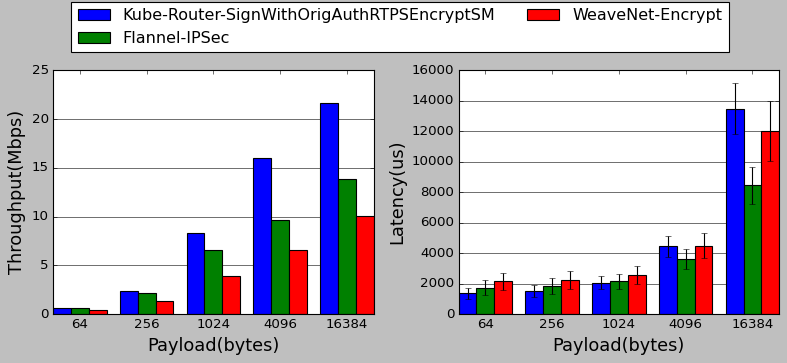

In [12]:
thp = np.array([[0.6, 2.4, 8.3, 16.0, 21.6],
[0.6, 2.2, 6.6, 9.6, 13.8],
[0.4, 1.3, 3.9, 6.6, 10.1],
[0.4, 1.2, 3.0, 4.3, 8.8],
[0.6, 2.2, 6.9, 8.4, 13.5]])

lat = [[1354.0, 1486.0, 2059.0, 4457.0, 13472.0],
[1726.0, 1840.0, 2142.0, 3609.0, 8439.0],
[2149.0, 2239.0, 2574.0, 4489.0, 12000.0],
[2202.0, 2359.0, 2839.0, 5861.0, 17940.0],
[2962.0, 3127.0, 3857.0, 7956.0, 21172.0]]

lat_std = [[362.6, 387.1, 418.0, 687.3, 1667.9],
[494.8, 506.0, 500.8, 628.9, 1210.9],
[553.6, 584.5, 583.6, 797.3, 1961.7],
[537.2, 557.6, 601.0, 913.8, 2349.6],
[900.7, 970.1, 1107.9, 1631.3, 3166.5]]

labels = ['Kube-Router-SignWithOrigAuthRTPSEncryptSM', 'Flannel-IPSec', 'WeaveNet-Encrypt']
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
bars = []
def helper(i, j, data, err, xlabel, ylabel, title=None):
    global ax, bars
    x = np.arange(len(data_len))
    total_width, n = 0.8, len(labels)
    width = total_width / n
    x = x - (total_width - width) / 2
    if err is not None:
        ax[j].bar(x+i*width, data[i], width=width, yerr=err[i])
    else:
        ax[j].bar(x+i*width, data[i], width=width)

    ax[j].grid(linestyle='-', axis='y')
    ax[j].set_ylabel(ylabel, fontsize=16)
    ax[j].set_xlabel(xlabel, fontsize=16)
    ax[j].set_title(title, fontsize=16)
    bars.append(ax[j])


    plt.xticks(x+(total_width - width) / 2, data_len)

for j in range(3):
    helper(j, 0, thp, None, 'Payload(bytes)', 'Throughput(Mbps)')
for j in range(3):
    helper(j, 1, lat, lat_std, 'Payload(bytes)', 'Latency(us)')

fig.legend(bars[:6],     # The line objects
           labels=labels,   # The labels for each line
           loc="center",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           bbox_to_anchor=(0.5, 1.05),
           ncol=2
           )
plt.tight_layout()
plt.savefig('4SubSecurity.png', dpi=600, bbox_inches='tight')